In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.tree import export_graphviz

import pydot

from pprint import pprint

<br>

### Reading in & Formatting Data

In [2]:
df_ToU = pd.read_csv('data/df_ToU.csv')
df_ToU.head(10)

,id,low_delta,high_delta,combined_DRS,DRS_rank,DoY_drop_weekend_max_combined_mean,DoY_drop_weekend_max_combined_var,DoY_max_combined_mean,DoY_max_combined_var,DoY_min_combined_mean,...,pt_Semi_detached,pt_terraced,pt_terraced_mid,pt_in_commercial,pt_purpose_built_block_tenemant,pt_converted_house_building,sml_hallway,sml_dont_know,sml_living_rm,sml_kitchen
0,140,0.298468,-0.124587,0.423056,1025,1.209031,0.490244,1.090893,0.505867,0.036560,...,0,0,0,0,1,0,1,0,0,0
1,969,0.217026,-0.131711,0.348738,1024,1.979500,0.685826,1.984946,0.640269,0.027844,...,0,0,0,0,1,0,0,0,1,0
2,323,0.200940,-0.128602,0.329541,1023,1.705271,0.385953,1.788514,0.364977,0.105587,...,0,1,0,0,0,0,0,0,0,1
3,144,0.250917,-0.077235,0.328152,1022,0.596357,0.185173,0.611358,0.177652,0.057974,...,0,0,1,0,0,0,0,0,0,0
4,656,0.207729,-0.079527,0.287256,1019,1.452321,0.184370,1.485547,0.227647,0.064797,...,0,1,0,0,0,0,0,0,0,1
5,186,0.076935,-0.208825,0.285761,1018,1.802891,0.158895,1.826480,0.167149,0.108202,...,0,0,1,0,0,0,0,1,0,0
6,847,0.156375,-0.111801,0.268175,1016,1.209869,0.298420,1.215270,0.300443,0.035959,...,0,0,1,0,0,0,0,0,0,1
7,423,0.168689,-0.089759,0.258448,1015,1.637021,0.320432,1.669904,0.325384,0.027476,...,0,0,0,0,1,0,0,0,0,1
8,143,0.131981,-0.123658,0.255639,1014,1.174806,0.121448,1.181813,0.135508,0.075731,...,1,0,0,0,0,0,0,0,0,1
9,693,0.168262,-0.086269,0.254531,1013,0.840942,0.152342,0.961063,0.210607,0.050159,...,0,0,1,0,0,0,0,0,0,0


<br>

### ML Model Data Preparation

In [4]:
response_list = ['low_delta', 'high_delta', 'combined_DRS', 'DRS_rank']
feature_list = list(df_ToU.drop(columns=response_list))

## Setting target variable
target = response_list[0]
features = feature_list#[:5] + feature_list[53:] #feature_list[5:53]
features

['id',
 'DoY_drop_weekend_max_combined_mean',
 'DoY_drop_weekend_max_combined_var',
 'DoY_max_combined_mean',
 'DoY_max_combined_var',
 'DoY_min_combined_mean',
 'SP_10_mean',
 'SP_10_var',
 'SP_11_mean',
 'SP_11_var',
 'SP_12_mean',
 'SP_12_var',
 'SP_13_mean',
 'SP_13_var',
 'SP_14_mean',
 'SP_14_var',
 'SP_15_mean',
 'SP_15_var',
 'SP_16_mean',
 'SP_16_var',
 'SP_17_mean',
 'SP_17_var',
 'SP_18_mean',
 'SP_18_var',
 'SP_19_mean',
 'SP_19_var',
 'SP_1_mean',
 'SP_1_var',
 'SP_20_mean',
 'SP_20_var',
 'SP_21_mean',
 'SP_21_var',
 'SP_22_mean',
 'SP_22_var',
 'SP_23_mean',
 'SP_23_var',
 'SP_24_mean',
 'SP_24_var',
 'SP_25_mean',
 'SP_25_var',
 'SP_26_mean',
 'SP_26_var',
 'SP_27_mean',
 'SP_27_var',
 'SP_28_mean',
 'SP_28_var',
 'SP_29_mean',
 'SP_29_var',
 'SP_2_mean',
 'SP_2_var',
 'SP_30_mean',
 'SP_30_var',
 'SP_31_mean',
 'SP_31_var',
 'SP_32_mean',
 'SP_32_var',
 'SP_33_mean',
 'SP_33_var',
 'SP_34_mean',
 'SP_34_var',
 'SP_35_mean',
 'SP_35_var',
 'SP_36_mean',
 'SP_36_var',
 '

In [11]:
def format_data_4_ML(df_ToU, target, features, print_arr_sizes=True):
    ## Converting features and target to arrays
    target_arr = np.array(df_ToU[target]).astype('float32')
    features_arr = np.array(df_ToU[features]).astype('float32')

    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features_arr, target_arr, test_size = 0.05, random_state = 42)

    ## Scaling the features
    scaler = preprocessing.StandardScaler().fit(test_features)
    test_features = scaler.transform(test_features)
    train_features = scaler.transform(train_features)

    ## Printing array sizes
    if print_arr_sizes == True:
        print('')
        print('Training Features Shape:', train_features.shape)
        print('Training Labels Shape:', train_labels.shape)
        print('Testing Features Shape:', test_features.shape)
        print('Testing Labels Shape:', test_labels.shape)
    
    return train_features, test_features, train_labels, test_labels

train_features, test_features, train_labels, test_labels = format_data_4_ML(df_ToU, target, features)


Training Features Shape: (741, 189)
Training Labels Shape: (741,)
Testing Features Shape: (39, 189)
Testing Labels Shape: (39,)


In [43]:
def determine_baseline_err(test_labels, print_err=True):
    # The baseline predictions are the historical averages
    baseline_preds = np.ones(test_labels.size)*np.average(test_labels)

    # Baseline errors, and display average baseline error
    baseline_errors = abs(baseline_preds - test_labels)
    baseline_error = np.mean(baseline_errors)
    
    if print_err == True:
        print('')
        print('Average baseline error: ', round(baseline_error, 4))
    
    return baseline_error

baseline_error = determine_baseline_err(test_labels)


Average baseline error:  0.0352


<br>

### First Run Random Forest Model

In [13]:
## RF Model Helper Functions

def run_metrics(test_labels, pred_test_labels, print_results=True, return_results=True):
    # Metrics
    MAE = metrics.mean_absolute_error(test_labels, pred_test_labels)
    MSE = metrics.mean_squared_error(test_labels, pred_test_labels)
    RMSE = np.sqrt(metrics.mean_squared_error(test_labels, pred_test_labels))
    MAPE = np.mean(np.abs((test_labels - pred_test_labels) / test_labels)) * 100
    r2 = metrics.r2_score(test_labels, pred_test_labels)

    # Metric Printout
    if print_results == True:
        print('')
        print(f'Mean Absolute Error: {round(MAE, 4)}')  
        print(f'Mean Squared Error: {round(MSE, 4)}')  
        print(f'Root Mean Squared Error: {round(RMSE, 4)}') 
        print(f'Mean Absolute Percentage Error: {int(MAPE)}')
        print(f'R2 Score: {round(r2, 4)}')
    
    if return_results == True:
        return {'MAE':MAE, 'MSE':MSE, 'RMSE':RMSE, 'MAPE':MAPE, 'r2':r2}
    
def create_df_importances(rf, features):
    # Get numerical feature importances
    importances = list(rf.feature_importances_)

    ## Creating dataframe of importances
    df_importances = (pd.DataFrame(data={'importances':importances, 'features':features})
                      .sort_values('importances', ascending=False)
                     )

    return df_importances

def plot_RF_var_importances(df_importances):
    # list of x locations for plotting
    x_values = list(range(len(df_importances.importances)))

    # Make a bar chart
    plt.figure(figsize=(20, 6))
    plt.bar(x_values, df_importances.importances, orientation = 'vertical')
    plt.grid(False)

    # Tick labels for x axis
    plt.xticks(x_values, df_importances.features, rotation='vertical')

    # Axis labels and title
    plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')


Training Features Shape: (741, 189)
Training Labels Shape: (741,)
Testing Features Shape: (39, 189)
Testing Labels Shape: (39,)

Mean Absolute Error: 0.0181
Mean Squared Error: 0.0006
Root Mean Squared Error: 0.0247
Mean Absolute Percentage Error: 528
R2 Score: 0.3369

Error reduction on baseline: 20.33%


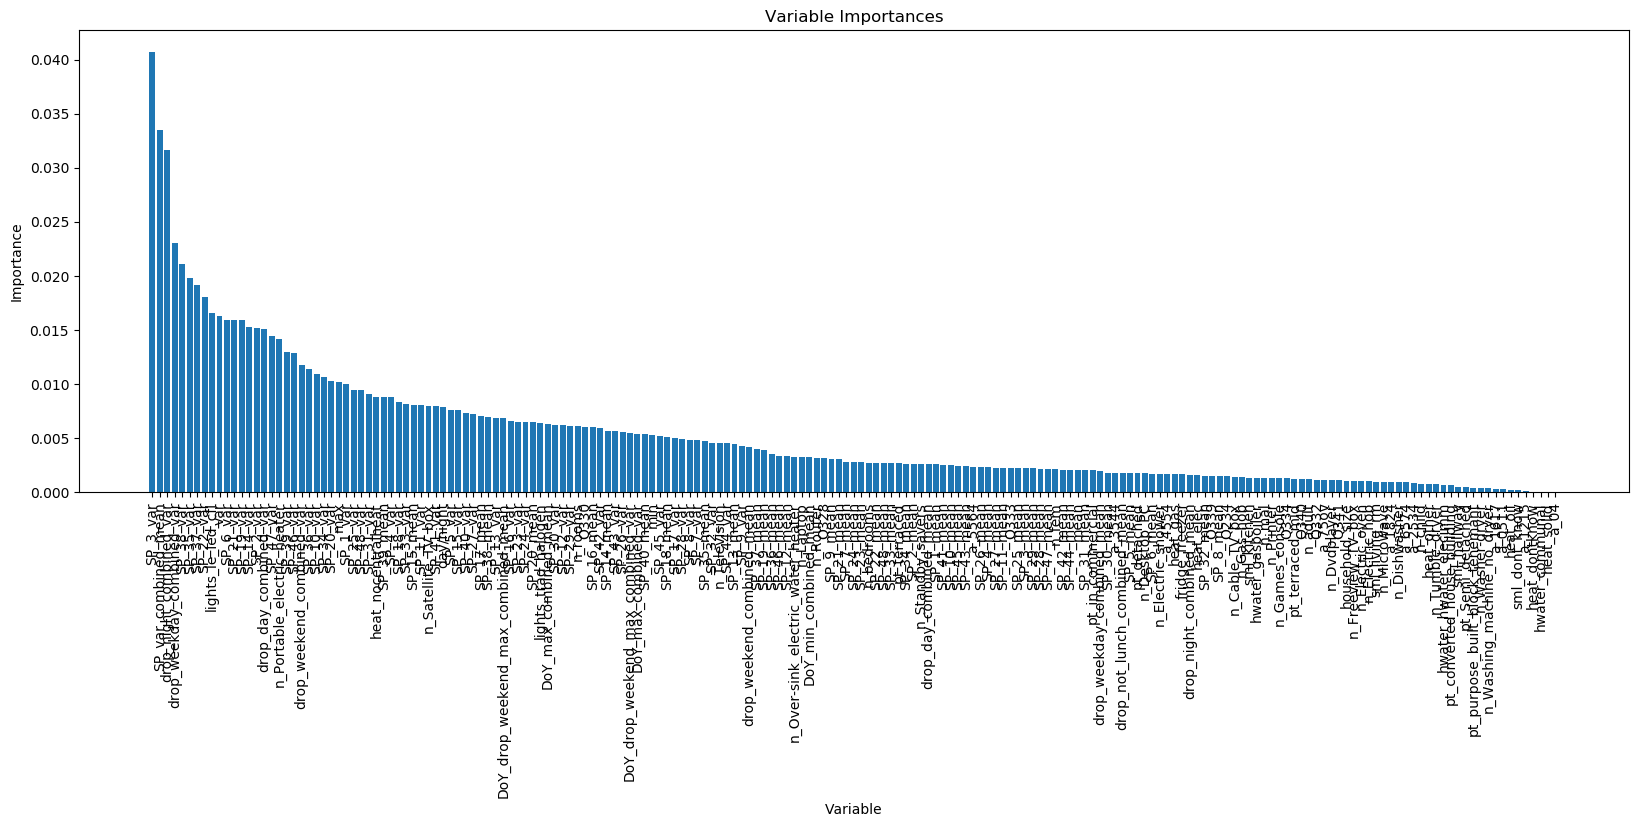

In [44]:
## Automated RM Model
def combined_RF_model(train_features, train_labels, test_features, test_labels, features, 
                      determine_importances=True, n_trees=1000, return_rf=True,
                      return_importances=True):
    
    if determine_importances == False and return_importances == True:
        raise ValueError("If importances are to be returned 'determine_importances' must be set to True")
    
    # Instantiate model with n decision trees
    rf = RandomForestRegressor(n_estimators = n_trees, random_state = 42)

    # Train the model on training data
    rf.fit(train_features, train_labels);

    # Using the forest's predict method on the test data
    pred_test_labels = rf.predict(test_features)
    
    # Running the metrics
    metrics_dict = run_metrics(test_labels, pred_test_labels)
    MAE = metrics_dict['MAE']

    # Improvement on baseline
    baseline_error = determine_baseline_err(test_labels, print_err=False)
    pct_reduction_on_baseline = round(100*(MAE-baseline_error)/baseline_error, 2)
    print('')
    print(f'Error reduction on baseline: {-pct_reduction_on_baseline}%')
    
    ## Plotting the importances of each variable in the model
    if determine_importances == True:
        df_importances = create_df_importances(rf, features)
        plot_RF_var_importances(df_importances)
        
    ## Returning RF objects
    if return_rf == True and return_importances == True:
        return rf, df_importances
    elif return_rf == True and return_importances == False:
        return rf
    elif return_rf == False and return_importances == True:
        return df_importances
    else:
        return 
      
target = response_list[0]
features = feature_list

train_features, test_features, train_labels, test_labels = format_data_4_ML(df_ToU, target, features)
rf, df_importances = combined_RF_model(train_features, train_labels, test_features, test_labels, features)

In [4]:
df_importances.head()

NameError: name 'df_importances' is not defined

<br>

### RF Model Tuning & Feature Selection


Training Features Shape: (741, 10)
Training Labels Shape: (741,)
Testing Features Shape: (39, 10)
Testing Labels Shape: (39,)

Mean Absolute Error: 0.0238
Mean Squared Error: 0.0011
Root Mean Squared Error: 0.0326
Mean Absolute Percentage Error: 244
R2 Score: 0.4774

Error reduction on baseline: 32.42%


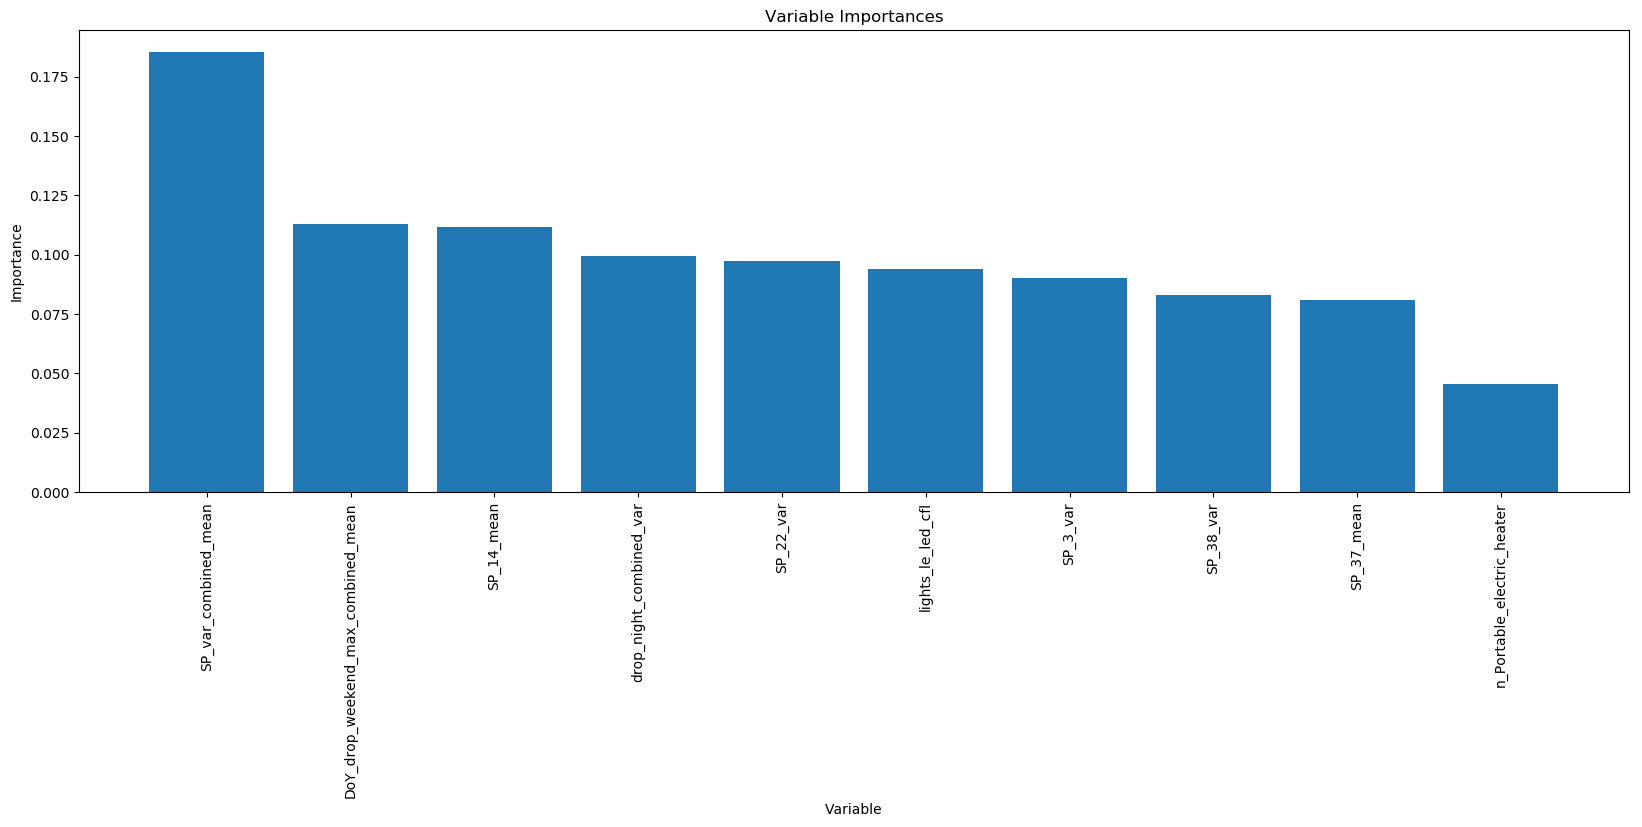

In [47]:
target = response_list[2]
features = ['SP_3_var', 'SP_var_combined_mean', 'SP_38_var', 'SP_22_var', 'lights_le_led_cfl', 'n_Portable_electric_heater'] + ['drop_night_combined_var', 'SP_37_mean', 'DoY_drop_weekend_max_combined_mean', 'SP_14_mean']

train_features, test_features, train_labels, test_labels = format_data_4_ML(df_ToU, target, features)
rf, df_importances = combined_RF_model(train_features, train_labels, test_features, test_labels, features)

## MAE goes down whilst MAPE and r2 go up, this model is better overall but worse for outliers

In [48]:
## Test some new variables like total var over mean
## Factor out linear relationships or they will dominate, secondary normaly more interesting. Or run on residuals

SP_3_var r2:-0.29071488713392046
SP_var_combined_mean r2:-0.2551326200179762
SP_38_var r2:-2.897690343875718
SP_22_var r2:-1.003190046686142
lights_le_led_cfl r2:-40512.33027402384
n_Portable_electric_heater r2:-377.288449706699
drop_night_combined_var r2:-0.8052360352505681
SP_37_mean r2:-39.23185560808424
DoY_drop_weekend_max_combined_mean r2:-264.081217276986
SP_14_mean r2:-10.439468756218819


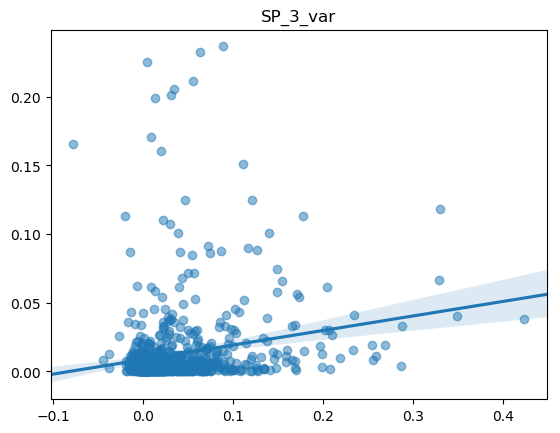

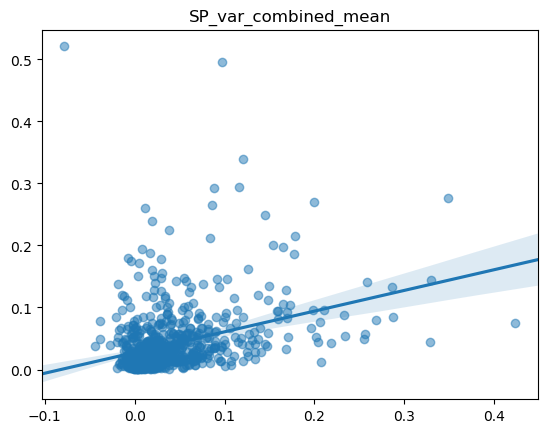

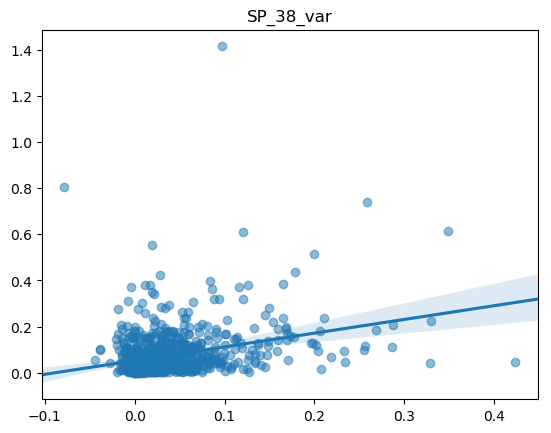

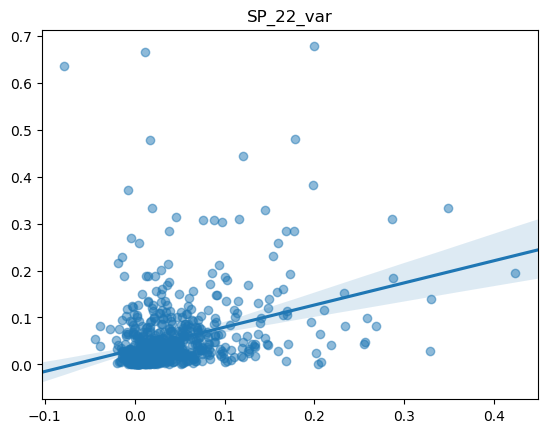

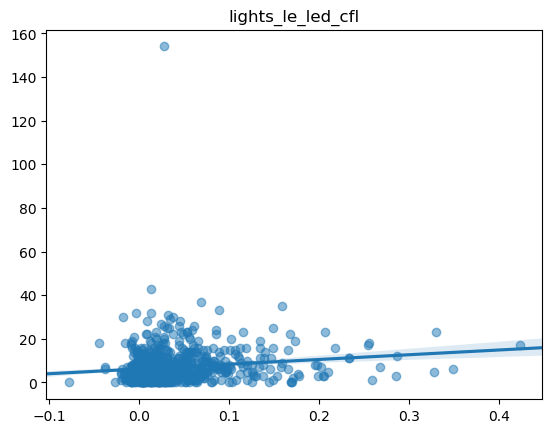

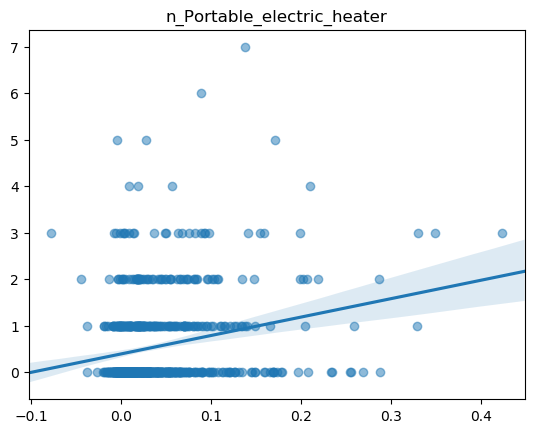

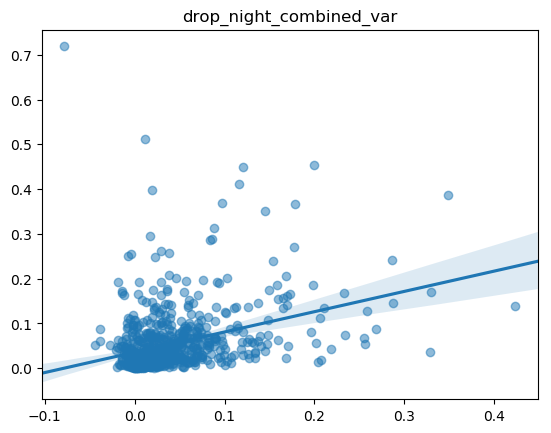

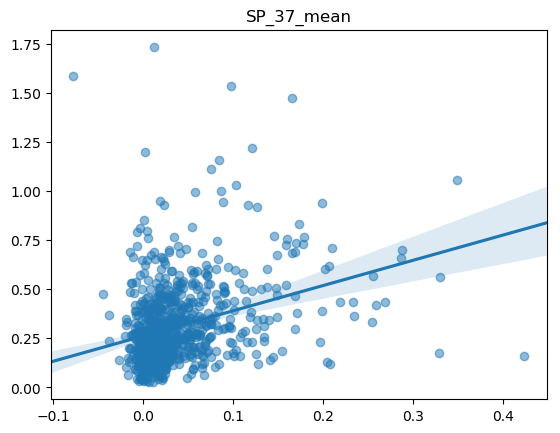

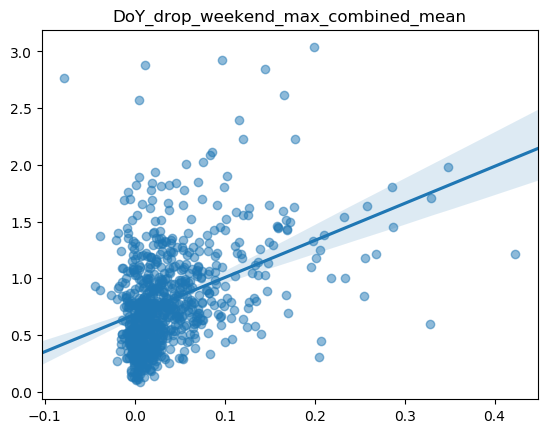

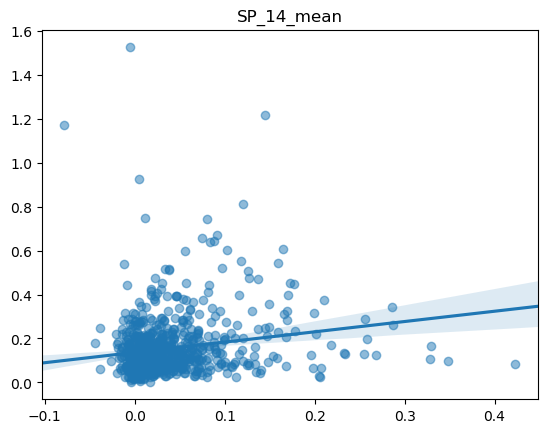

In [49]:
mpl.rcParams.update(mpl.rcParamsDefault)

target_arr = np.array(df_ToU[target])
features_arr = np.array(df_ToU[features])

for i in range(features_arr.shape[1]):
    feature_arr = features_arr[:, i]
    
    plt.figure()
    sns.regplot(target_arr, feature_arr, scatter_kws={'alpha':0.5})
    print(f'{features[i]} r2:{metrics.r2_score(target_arr, feature_arr)}')
    plt.title(features[i])